In [1]:
# Import Dependencies 

import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns
from config import geoapify_key
from datetime import date
import os

In [2]:
#Create Dataframe from the downloaded CSV file in import folder

uber_df = pd.read_csv('import/UberDataset.csv')
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
#Look at how many non null rows we have to work with
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
# Cleaning data

# filling null purpose
uber_df["PURPOSE"] = uber_df["PURPOSE"].fillna("Miscellaneous")

# getting rid of null cells
uber_df.dropna(inplace = True)

# replacing mispelled values
uber_df = uber_df.replace({"START":{"R?walpindi":"Rawalpindi", "Kar?chi":"Karachi"}})
uber_df = uber_df.replace({"STOP":{"R?walpindi":"Rawalpindi", "Kar?chi":"Karachi"}})

uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
uber_df['START_DATE'].dtypes

dtype('O')

In [6]:
uber_df['day_wk'] = pd.to_datetime(uber_df['START_DATE'])
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day_wk
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous,2016-01-02 01:25:00
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00


In [7]:
uber_df['new_days'] = uber_df['day_wk']

In [8]:
for i in range(len(uber_df)):
    uber_df['new_days'][i] = date.weekday(uber_df['day_wk'][i])

uber_df.head()

C:\Users\krlin\AppData\Local\Temp\ipykernel_5560\2044241861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df['new_days'][i] = date.weekday(uber_df['day_wk'][i])


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day_wk,new_days
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,4
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous,2016-01-02 01:25:00,5
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,5
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,1
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2


In [9]:
uber_df['new_days_1'] = uber_df['new_days'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                                4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day_wk,new_days,new_days_1
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,4,Friday
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous,2016-01-02 01:25:00,5,Saturday
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,5,Saturday
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,1,Tuesday
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2,Wednesday


In [10]:
# Filled blanks with 'Miscellaneous'. Now we have 1155 non null rows of data

uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   object        
 1   END_DATE    1155 non-null   object        
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
 7   day_wk      1155 non-null   datetime64[ns]
 8   new_days    1155 non-null   object        
 9   new_days_1  1155 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 131.5+ KB


In [11]:
uber_df.to_csv("output/cleaned_UberDataset.csv")

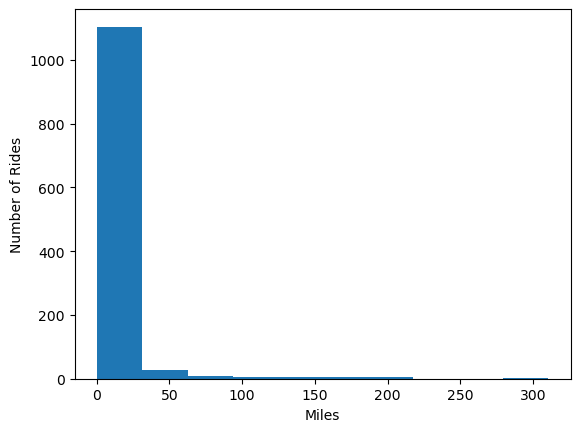

In [12]:
# Data Exploration:

bins_variable = [0,5,10,15,20,25,30,50,100,150, 250]
plt.hist(uber_df['MILES'])
plt.xlabel('Miles')
plt.ylabel('Number of Rides')
plt.show()

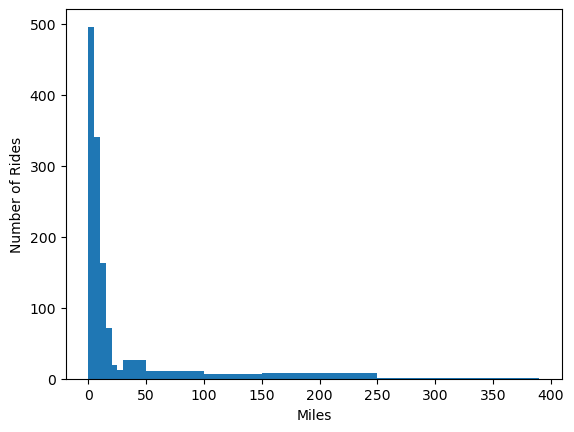

In [13]:
# Increasing the bins for a wider variety of milage driven per ride.

bins_variable = [0,5,10,15,20,25,30,50,100,150, 250, 390]
plt.hist(uber_df['MILES'], bins=bins_variable)
plt.xlabel('Miles')
plt.ylabel('Number of Rides')
plt.show()

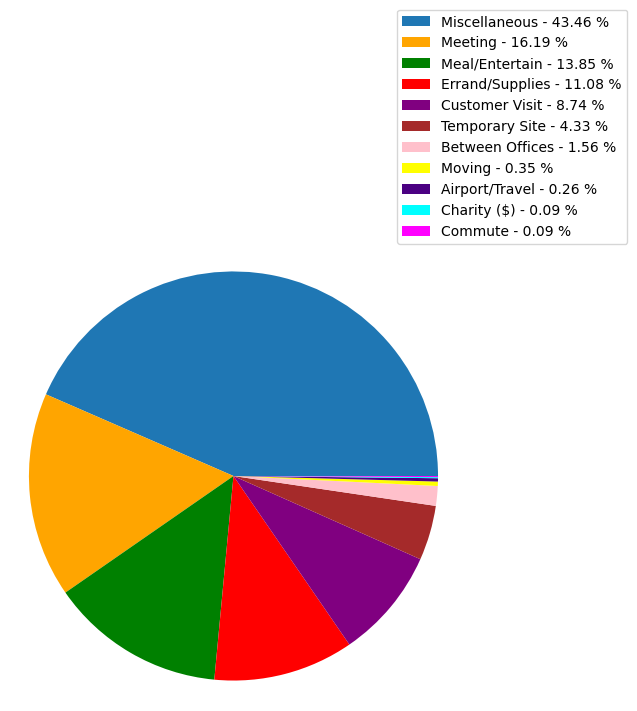

In [14]:
# pie charts, line regression?, box and whisker? strip plot?


# matplotlib
# gathering data from df
purpose_data = uber_df["PURPOSE"].value_counts()

# set variables
sizes = []
labels = []
colors = ["tab:blue", "orange", "green", "red", "purple", "brown", "pink", "yellow", "indigo", "cyan", "magenta"]
percents = []
sum_data = 0

# adding sizes using for loop
for i in range(len(purpose_data)):
    sizes.append(purpose_data[i])
    sum_data += sizes[i]

# new loop to make percents
for i in range(len(sizes)):
    percentage = sizes[i]/sum_data*100
    percents.append(percentage)

# use list() function to get series index for labels
labels = list(purpose_data.index.values)

# adding percentages to labels to show on legend, using list comprehension
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percents)]

# making pie chart
patches, texts = plt.pie(sizes, colors=colors)

# making the legend and formatting it
plt.legend(patches, labels, loc="best", bbox_to_anchor=(0.85, 1))

# formatting display to look nicer
plt.axis('equal')
plt.tight_layout()
# show
plt.show()

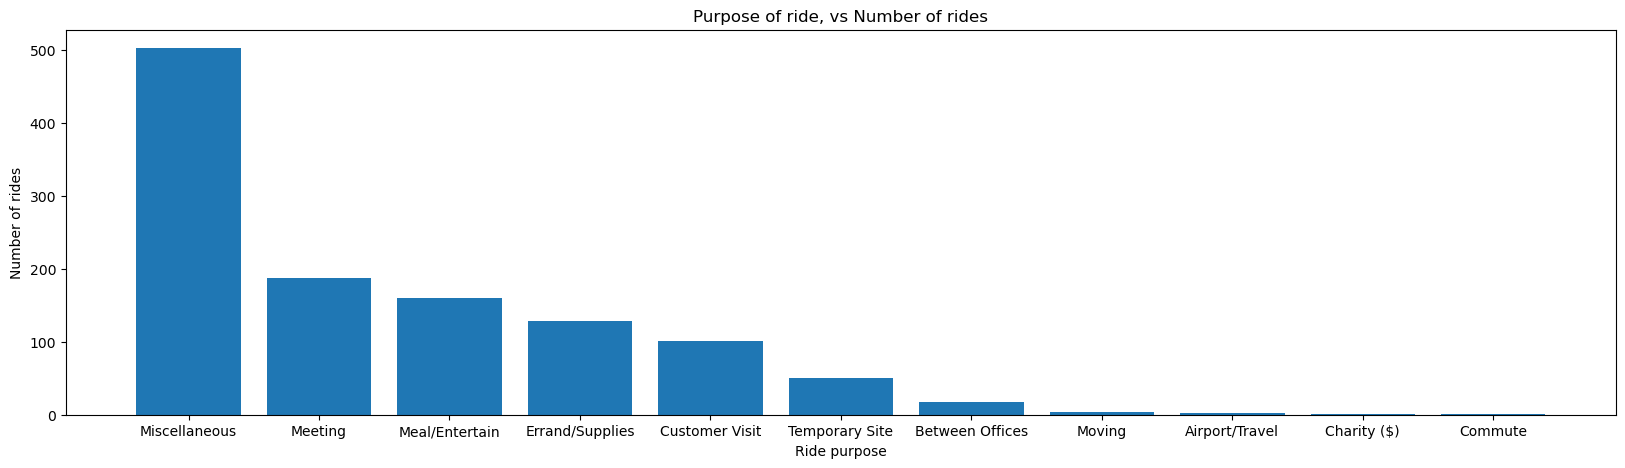

In [15]:
# Build scatter plot for Purpose of ride, vs Ride start count

plt.figure(figsize= (20,5))

plt.bar(uber_df["PURPOSE"].value_counts().index, uber_df["PURPOSE"].value_counts())

# Incorporate the other graph properties
plt.title("Purpose of ride, vs Number of rides")
plt.xlabel("Ride purpose")
plt.ylabel("Number of rides")



# Show plot
plt.show()

In [ ]:
# Build scatter plot for 
#plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
#plt.title("City Latitude vs. Max Temperature")
#plt.xlabel("Latitude")
#plt.ylabel("Max Termperature")
#plt.grid(linestyle='-', linewidth=1, alpha=0.5)




# Show plot
#plt.show()

In [16]:
# Extract individual groups
group0 = uber_df[uber_df["new_days"] == 0]["day_wk"]
group1 = uber_df[uber_df["new_days"] == 1]["day_wk"]
group2 = uber_df[uber_df["new_days"] == 2]["day_wk"]
group3 = uber_df[uber_df["new_days"] == 3]["day_wk"]
group4 = uber_df[uber_df["new_days"] == 4]["day_wk"]
group5 = uber_df[uber_df["new_days"] == 5]["day_wk"]
group6 = uber_df[uber_df["new_days"] == 6]["day_wk"]


In [17]:
# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=2.612649417410859, pvalue=0.016089056495715532)